#Versuch 2 GP1

##Aufgabe 1

a)

Der Versuchsaufbau ist in Abbildung 1 zu sehen. Dem IOLab-Gerät wurde ein Stoß gegeben, sodass es sich in Richtung des Maßbandes bewegt. Es wurde dann abgelesen, wie weit das IOLab-Gerät gerollt ist bis es zum Stillstand kam. Dies wurde zehn Mal wiederholt.

Fehler der eigenen Messung schätze ich auf 2mm auf Grund von Ablesefehler und krümmung des Lineals.



$a = \frac{Distanz IOLab}{Distanz Messung} = \frac{x}{y}$

$δa = \sqrt{(\frac{∂f}{∂x}δx)^2 + (\frac{∂f}{∂y}δy)^2} = \sqrt{(\frac{1}{y}δx)^2 + (-\frac{x}{y^2}δy)^2}$

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
import statistics
import math
import pandas as pd

def column(matrix, i):
    return [row[i] for row in matrix]

data = [['0.180(2)m', '0.181(1)m', 1.00555555556, 0.01247784196],
        ['0.281(2)m', '0.280(1)m', 0.99644128113, 0.00793489046],
        ['0.130(2)m', '0.123(1)m', 0.94615384615, 0.01646374608],
        ['0.157(2)m', '0.154(1)m', 0.98089171974, 0.01402517436],
        ['0.107(2)m', '0.105(1)m', 0.98130841121, 0.02058593357],
        ['0.132(2)m', '0.127(1)m', 0.96212121212, 0.01642858342],
        ['0.082(2)m', '0.081(1)m', 0.98780487804, 0.02700340909],
        ['0.181(2)m', '0.179(1)m', 0.98895027624, 0.01224488213],
        ['0.124(2)m', '0.123(1)m', 0.99193548387, 0.01791656001],
        ['0.149(2)m', '0.151(1)m', 1.01342281879, 0.01516853243]]
df = pd.DataFrame(data, columns = ['Distanz Messung','Distanz IOLab', 'a', 'δa'])
df.head(10)

,Distanz Messung,Distanz IOLab,a,δa
0,0.180(2)m,0.181(1)m,1.005556,0.012478
1,0.281(2)m,0.280(1)m,0.996441,0.007935
2,0.130(2)m,0.123(1)m,0.946154,0.016464
3,0.157(2)m,0.154(1)m,0.980892,0.014025
4,0.107(2)m,0.105(1)m,0.981308,0.020586
5,0.132(2)m,0.127(1)m,0.962121,0.016429
6,0.082(2)m,0.081(1)m,0.987805,0.027003
7,0.181(2)m,0.179(1)m,0.988950,0.012245
8,0.124(2)m,0.123(1)m,0.991935,0.017917
9,0.149(2)m,0.151(1)m,1.013423,0.015169


In [ ]:
print('Standardabweichung a:', statistics.stdev(column(data, 2)))
print('Mittelwert a:', np.mean(column(data, 2)))

Standardabweichung a: 0.01970259176108574
Mittelwert a: 0.985458548285


- Die Fehler von a, sowie die Standardabweichung sind akzeptabel und passen zusammen es gibt lediglich vereinzelt Ausreißerwerte.

- Ja das Rad ist gut kalibriert, da der Mittelwert gleich 1 in der experimentellen Unsicherheit ist.

- Der Fehler δa bestimmt die Präzision des Radsensors. Um mit schlechter Präzision umzugehen kann eine höhere Wiederholungsanzahl des Versuchs helfen, da sich statistische Abweichungen dann aufheben und so Mittelwerte und Standardabweichung immer genauer werden.

## Aufgabe 2.1

a)

Das IOLab-Gerät wurde an seinem Kraftsensor an einem Faden aufgehangen und zum Schwingen gebracht. Dann konnte anhand des Kraftsensors  der Verlauf der Schwingung aufgezeichnet werden. L wurde hierbei durch eine Messung des Fadens vom Drehpunkt bis zum Schwerpunkt des IOLab-Geräts gemessen. Die Schwingungsperiodendauer T konnte anhand des Sinus-förmigen Graphen des Kraftsensors abgelesen werden, da eine Schwingung des Pendels jeweils zwei Kraftminimums und Maximums beinhaltet. $θ_0$ wurde bei der Aufzeichnung der Schwingung geschätz und kann allerdings später anhand der Formel (3) genau berechnet werden.

b)

Der genaue Verlauf der Schwingung kann in meinem Plot des Kraftsensors betrachtet werden. Aus ihm lassen sich wichtige Werte die für spätere Rechnungen benötigt werden ablesen:
- $Kraft_{min} = -2,044N$
- $Kraft_{max} = -2,141N$
- $Zeit_{Intervall} = 5,59s$
- $Schwingungsperioden_{Intervall} = 4,5$

weitere Werte:
- $L = 0,375m$
- $δL = 0,01m$
- $δZeit_{Intervall} = 0,1s$


$Schwingungsperiodendauer = T = \frac{Zeit_{Intervall}}{Schwingungsperioden_{Intervall}} = 1,242s$

$δSchwingungsperiodendauer = δT = 0,02s$

aus Gleichung 2 folgt:

$\Rightarrow g = 4\pi^2 \frac{L}{T_0^2} = 9,6 \frac{m}{s^2}$

$\Rightarrow δg = \sqrt{(\frac{4\pi^2}{T_o^2}δL)^2 + (\frac{8\pi^2*L}{T_0^3}δT_o)^2} = 0,4\frac{m}{s^2}$

c)

Der Wert hat die richtige Größenordnung wie der Literaturwert, ist allerdings nicht sehr genau, dennoch liegt der Literaturwert in dem berechneten Fehlerbereich. Ich habe mich gefragt, woher diese Ungenauigkeit kommt und habe deshalb meinen Ausklenkungswinkel, den ich nur geschätzt habe anhand des Literaturwerts und der Gewichtskraft $F_0$ des Geräts in Ruhe berechnet:

$θ_0 = \arccos({\frac{F_{(θ_0)}}{F_0}}) = \arccos({\frac{F_{min}}{F_0}}) = 13,83°$

Es ist zu erkennen, dass ich den Auslenkungswinkel $θ_0$ zugroß gewählt habe, weshalb die Kleinwinkelnäherung, die nur für Winkel kleiner als 10° gilt, wahrscheinlich die Ungenauigkeit für meinen Wert für g erzeugt.

Ich werde nun im Weiteren mit dem von mir durch den Literaturwert von g berechneten Winkel $θ_0$ weiter rechnen und g noch anhand von Gleichung 3 bestimmen.

Aus Gleichung 3 folgt:

$\Rightarrow g = 4\pi^2(1+\frac{θ_0^2}{16})^2 * \frac{L}{T_2^2} = 9,62 \frac{m}{s^2}$

Der Wert wurde etwas genauer entspricht aber immer noch nicht wirklich dem Literaturwert, dies könnte damit zusammenhängen, dass Gleichung 3 auch nur die Korrektur der Kleinwinkelnäherung für Winkel unter 10° ist.

In meinem Fall ist die größte Unsicherheit bei der Bestimmung von g die Messung des Auslenkungswinkels, außerdem erhalten wir zusätzlich noch eine Unsicherheit bei der Messung der Fadenlänge L, da wir den Schwerpunkt des IOLab-Geräts nicht genau bestimmen können.



## Aufgabe 2.2

a)

In [ ]:
data2 = [[1, 6, 2.3, 0.023, 13.8, 0.0093897107],
        [2, 1, 3.06, 0.0306, 3.06, 0.0306],
        [5, 5, 3.92, 0.0392, 19.6, 0.0175307729],
        [10, 2, 4.1, 0.041, 8.2, 0.028991378]]

df2 = pd.DataFrame(data2, columns = ['Cent','Anzahl', 'Gewicht Münze in g', 'δGewicht Münze in g', 'Gesamtgewicht in g', 'δGesamtgewicht in g'])
df2.head(4)

,Cent,Anzahl,Gewicht Münze in g,δGewicht Münze in g,Gesamtgewicht in g,δGesamtgewicht in g
0,1,6,2.30,0.0230,13.80,0.009390
1,2,1,3.06,0.0306,3.06,0.030600
2,5,5,3.92,0.0392,19.60,0.017531
3,10,2,4.10,0.0410,8.20,0.028991


In [ ]:
gesamtgewicht = data2[0][4] + data2[1][4] + data2[2][4] + data2[3][4]
print('Gesamtgewicht =', gesamtgewicht, 'g')

Gesamtgewicht = 44.66 g


$Gesamtmasse = m = m_1 * a_1 + m_2 * a_2 + m_5 * a_5 + m_{10} * a_{10}$
$δm = \sqrt{(δm_1)^2 + (δm_2)^2 + (δm_5)^2 + (δm_{10})^2} = 0,0466084342 g$

b)

Will man eine möglichst genaue Messung machen mit genau 100g Münzen, so bietet es sich an möglichst viele Münzen zu haben, dass heißt nur 1 Cent Münzen zu benutzen. Dadurch gleicht sich die statistische Abweichung sehr gut aus, da eine große Anzahl vorhanden ist. Dies kann man auch mathematisch an der Formel für den Fehler der Gesamtmasse einer Münzenart ablesen:
$δm_{1(gesamt)} = \frac{δm_1}{\sqrt{n}}$

## Aufgabe 2.3

a)

Es soll die Genauigkeit des Kraftsensors des IOLab-Geräts bestimmt werden. Hierzu wird die Gewichtskraft eines Bechers und die Gewichtskraft des gleichen Bechers mit den Münzen als Inhalt aufgezeichnet.

In [ ]:
data3 = [['Messwert', -0.876, -1.261, -0.385, 0.04466, 9.6, -0.4287, 0.9],
        ['Unsicherheit', 0.004, 0.004, 0.006, 0.00005, 0.4, 0.018, 0.1]]

df3 = pd.DataFrame(data3, columns = ['-','Kraft leerer Becher in N','Kraft voller Becher in N', 'Kraftdifferenz in N', 'Gewicht Münze in kg', 'Erdbeschleunigung in m/s^2', 'Gewichtskraft der Münzen in N', 'a'])
df3.head(2)

,-,Kraft leerer Becher in N,Kraft voller Becher in N,Kraftdifferenz in N,Gewicht Münze in kg,Erdbeschleunigung in m/s^2,Gewichtskraft der Münzen in N,a
0,Messwert,-0.876,-1.261,-0.385,0.04466,9.6,-0.4287,0.9
1,Unsicherheit,0.004,0.004,0.006,0.00005,0.4,0.0180,0.1


Da der Wert für a bei 0,9 liegt ist das IOLab-Gerät mit einer Abweichung von 10% gut kalibriert.

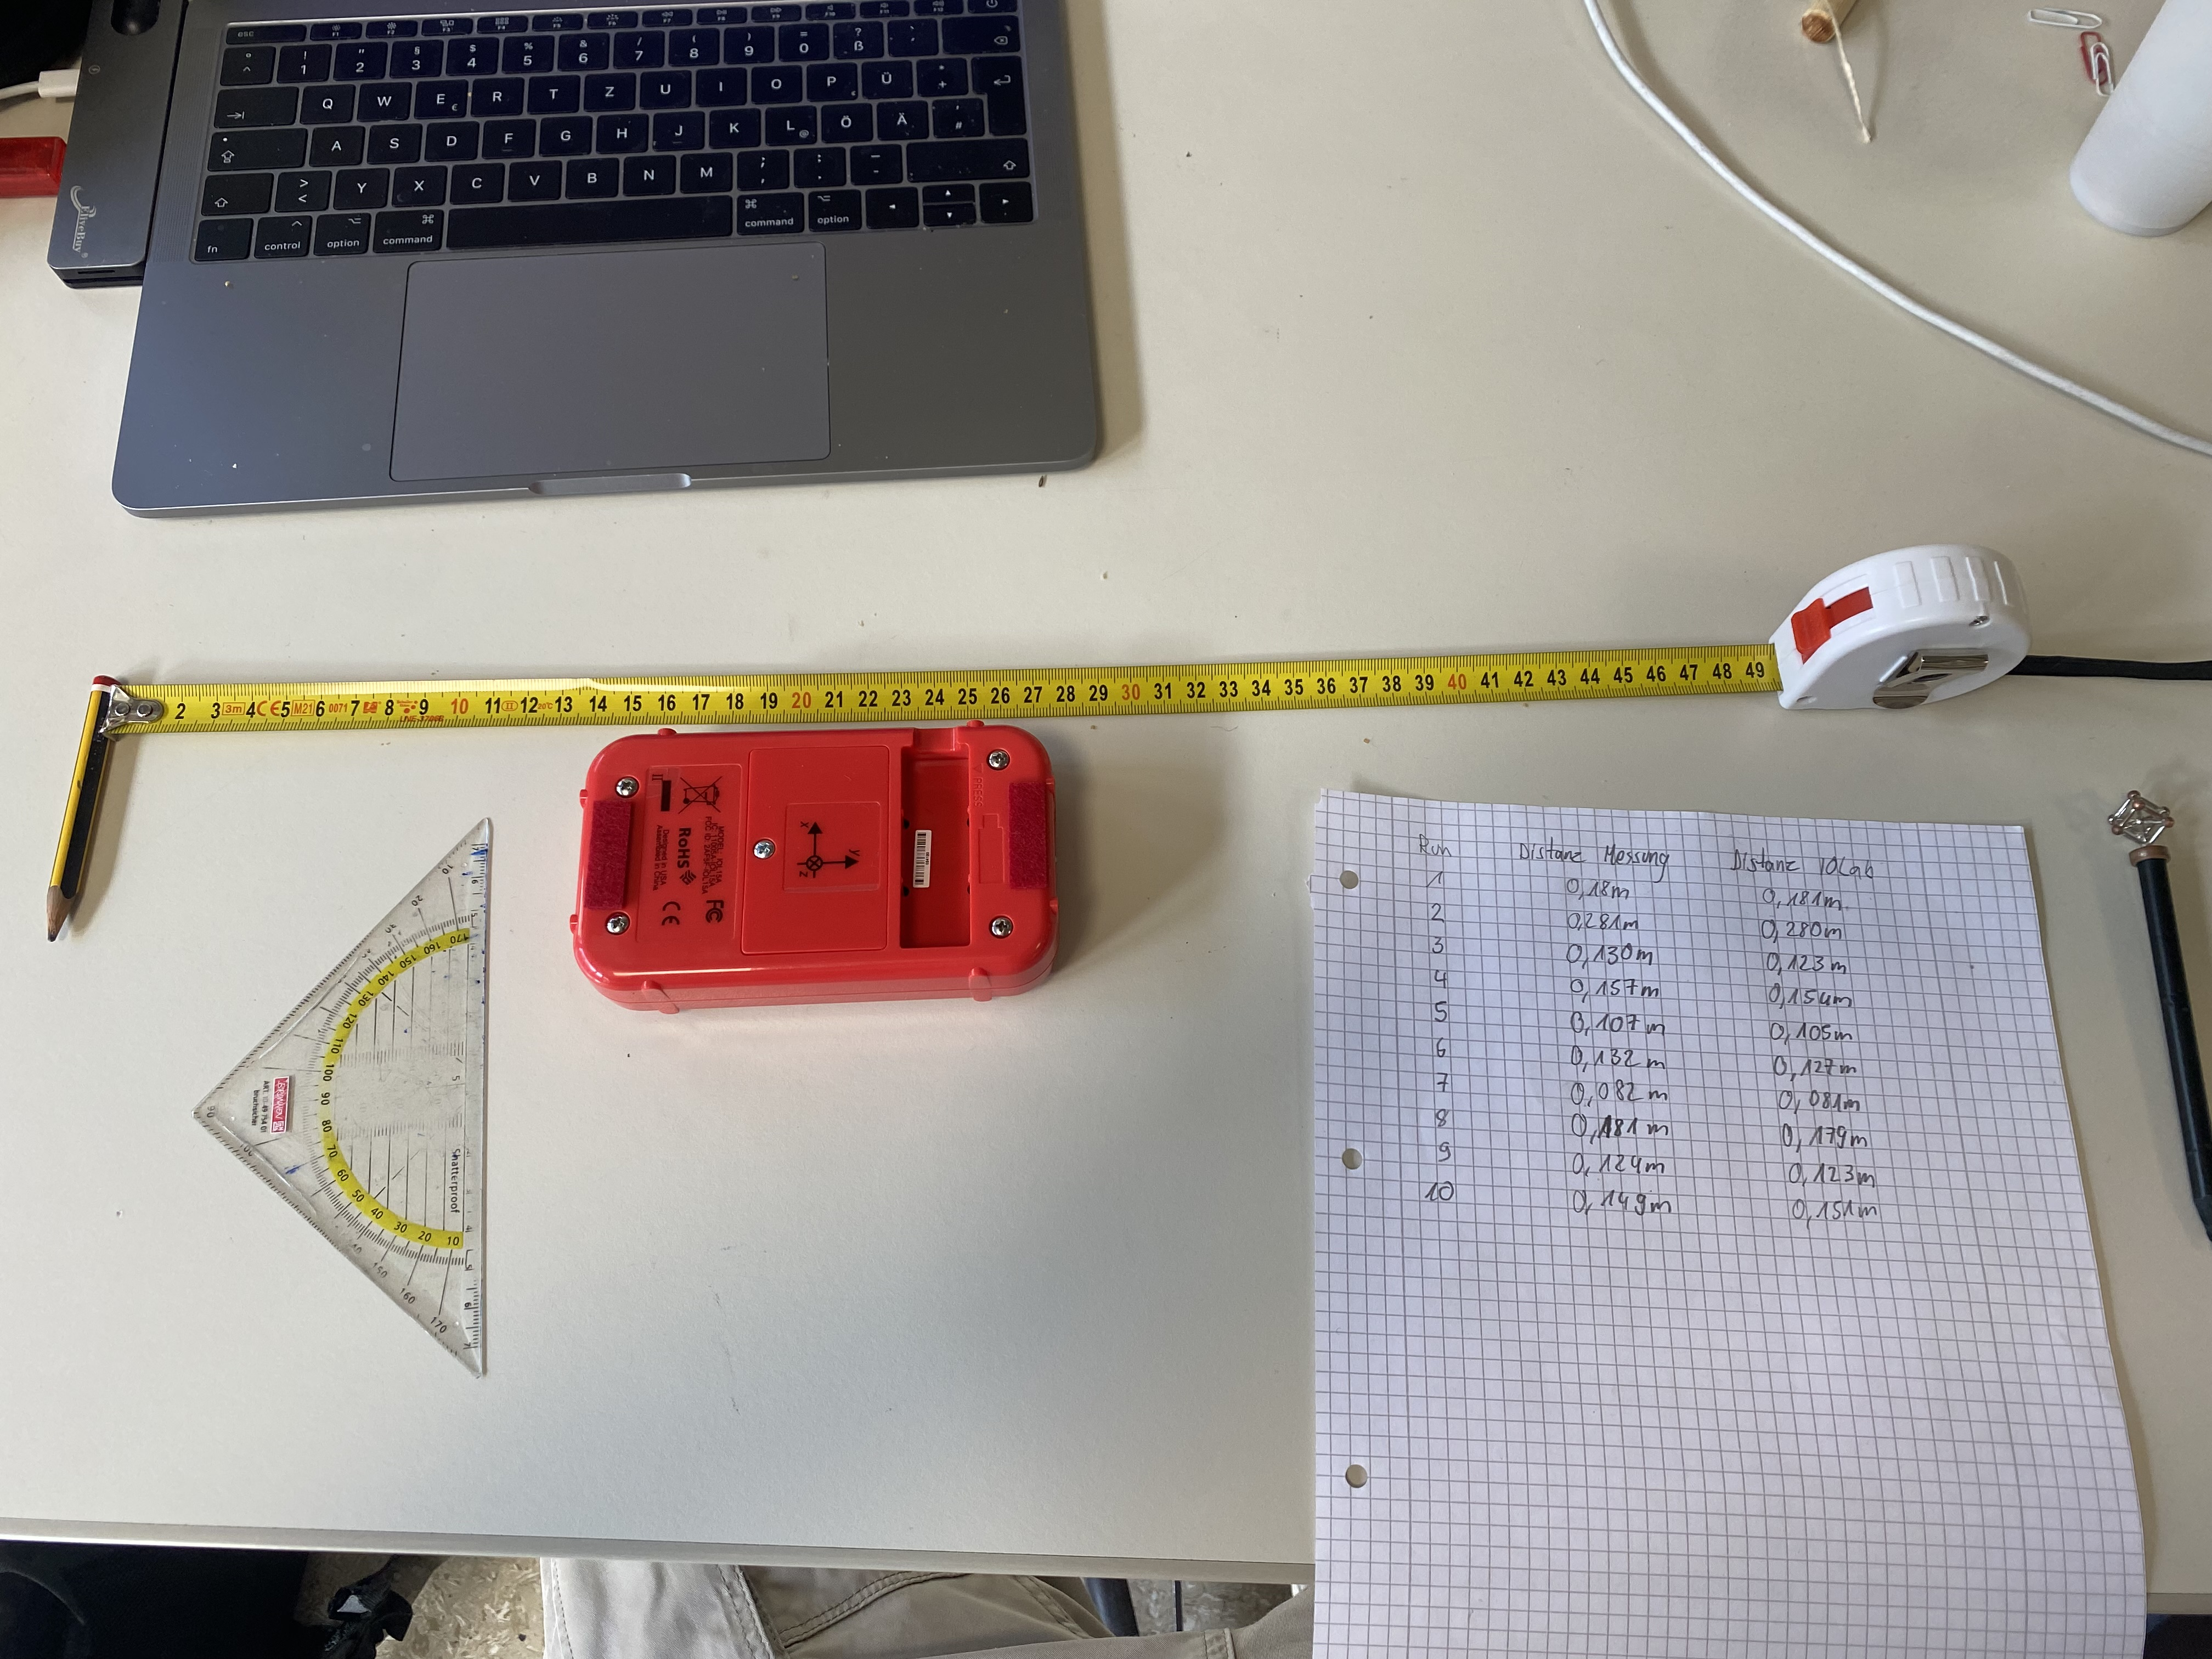